In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
sum_t1 = pd.read_csv('summary_t1.csv')
sum_t1

,Question Number,Topic,Cosine Similarity,Marks,Average Number,Percentage Attainment,Module
0,Q1,chi-square,0.500000,5,3.039267,60.785340,Classification Algorithms
1,Q2,decision tree based algorithm,0.707107,6,4.732984,78.883072,Classification Algorithms
2,Q3,further development of data cube and olap tech...,0.250000,3,1.424084,47.469459,Dimensional modeling and OLAP Technology
3,Q4,term-frequency,1.000000,4,1.676440,41.910995,"Searching , crawling and indexing Algorithms"
4,Q5,data warehouse,0.500000,2,1.659686,82.984293,Data Warehouse Concepts


In [26]:
sum_t2 = pd.read_csv('summary_t2.csv')
sum_t2

,Question Number,Topic,Cosine Similarity,Marks,Average Number,Percentage Attainment,Module
0,Q1,performance evaluation of classifiers: precisi...,0.577350,3,1.633508,54.450262,Classification Algorithms
1,Q2,hierarchical methods,0.500000,4,3.081152,77.028796,Clustering Algorithms
2,Q3,naive bayes classification,0.408248,8,4.934555,61.681937,Classification Algorithms
3,Q4,: dbscan,0.707107,2,0.345550,17.277487,Clustering Algorithms
4,Q5,data warehouse,0.500000,3,1.314136,43.804538,Data Warehouse Concepts


In [27]:
sum_t3 = pd.read_csv('summary_t3.csv')
sum_t3

,Question Number,Topic,Cosine Similarity,Marks,Average Number,Percentage Attainment,Module
0,Q1,item-to-item recommendation,0.866025,8,5.903141,73.789267,Recommendation Algorithms
1,Q2,apriori algorithm,1.000000,10,7.683246,76.832461,Association Algorithms
2,Q3,random,0.707107,6,3.528796,58.813264,Web caching Algorithm
3,Q4,: dbscan,0.707107,11,4.049738,36.815802,Clustering Algorithms


In [32]:
module_marks = {}

def func(table, module_marks):
    for i in range(0, len(table['Module'])):
        if(table['Module'][i] in module_marks):
            module_marks[table['Module'][i]] += table['Marks'][i]
        else:
            module_marks[table['Module'][i]] = table['Marks'][i]

func(sum_t1, module_marks)
func(sum_t2, module_marks)
func(sum_t3, module_marks)
module_marks

{'Classification  Algorithms': 22,
 'Dimensional modeling and OLAP Technology ': 3,
 'Searching , crawling and indexing Algorithms': 4,
 'Data Warehouse Concepts': 5,
 'Clustering Algorithms': 17,
 'Recommendation Algorithms': 8,
 'Association  Algorithms': 10,
 'Web caching Algorithm': 6}

In [53]:
modules = module_marks.keys()

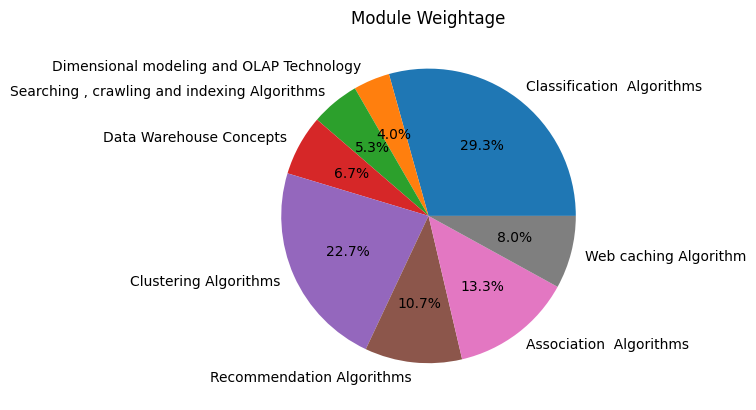

In [33]:
y = module_marks.values()
mylabels = module_marks.keys()
fig, ax = plt.subplots()
ax.pie(y, labels=mylabels, autopct='%.1f%%')
ax.set_title('Module Weightage')
plt.tight_layout()

1. Classification Algorithms are hot topics <br>
2. Dimensional Modelling and OLAP Technology is cold topic

In [34]:
module_avg_attainment = {}

def func(table, module_avg_attainment):
    for i in range(0, len(table['Module'])):
        if(table['Module'][i] in module_avg_attainment):
            module_avg_attainment[table['Module'][i]] += table['Average Number'][i]
        else:
            module_avg_attainment[table['Module'][i]] = table['Average Number'][i]

func(sum_t1, module_avg_attainment)
func(sum_t2, module_avg_attainment)
func(sum_t3, module_avg_attainment)
module_avg_attainment

{'Classification  Algorithms': 14.340314136125656,
 'Dimensional modeling and OLAP Technology ': 1.4240837696335078,
 'Searching , crawling and indexing Algorithms': 1.676439790575916,
 'Data Warehouse Concepts': 2.973821989528796,
 'Clustering Algorithms': 7.476439790575917,
 'Recommendation Algorithms': 5.903141361256544,
 'Association  Algorithms': 7.683246073298429,
 'Web caching Algorithm': 3.5287958115183247}

In [41]:
per_attainment = {}
def get_per_attainment_by_module(module_avg_attainment):
    for key, val in module_avg_attainment.items():
        per_attainment[key] = (val/module_marks[key])*100

get_per_attainment_by_module(module_avg_attainment)
per_attainment

{'Classification  Algorithms': 65.18324607329843,
 'Dimensional modeling and OLAP Technology ': 47.46945898778359,
 'Searching , crawling and indexing Algorithms': 41.9109947643979,
 'Data Warehouse Concepts': 59.47643979057592,
 'Clustering Algorithms': 43.97905759162304,
 'Recommendation Algorithms': 73.7892670157068,
 'Association  Algorithms': 76.83246073298429,
 'Web caching Algorithm': 58.813263525305416}

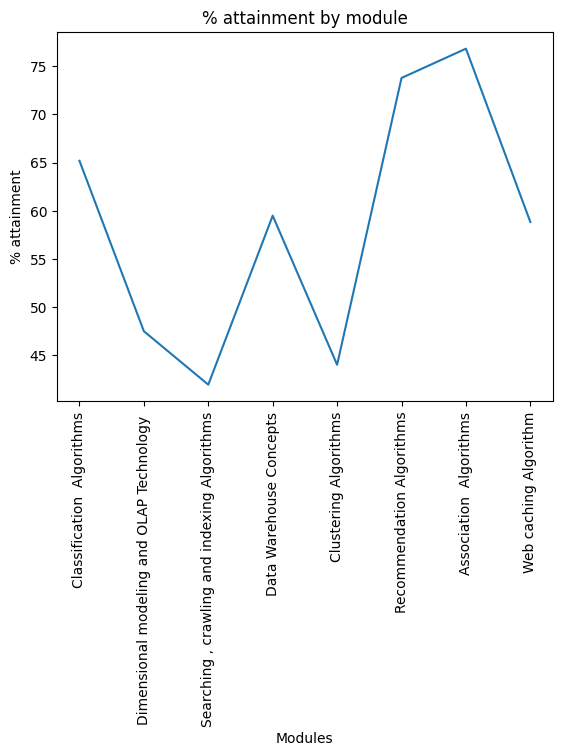

In [43]:
per_marks = per_attainment.values()
module = per_attainment.keys()
plt.plot(module, per_marks)
plt.xticks(rotation = 90)
plt.xlabel("Modules")
plt.ylabel("% attainment")
plt.title("% attainment by module")
plt.show()

In [51]:
module_topics = {}
def get_module_topics(table):
    for i in range(0, len(table['Module'])):
        if(table['Module'][i] in module_topics):
            if(table['Topic'][i] not in module_topics[table['Module'][i]]):
                module_topics[table['Module'][i]].append(table['Topic'][i])
        else:
            module_topics[table['Module'][i]] = [table['Topic'][i]]

get_module_topics(sum_t1)
get_module_topics(sum_t2)
get_module_topics(sum_t3)
module_topics

{'Classification  Algorithms': ['chi-square',
  'decision tree based algorithm',
  'performance evaluation of classifiers: precision recall',
  'naive bayes classification'],
 'Dimensional modeling and OLAP Technology ': ['further development of data cube and olap technology'],
 'Searching , crawling and indexing Algorithms': ['term-frequency'],
 'Data Warehouse Concepts': ['data warehouse'],
 'Clustering Algorithms': ['hierarchical methods', ': dbscan'],
 'Recommendation Algorithms': ['item-to-item recommendation'],
 'Association  Algorithms': ['apriori algorithm'],
 'Web caching Algorithm': ['random']}

In [52]:
from course_des_to_dic import ext_cod

cd = ext_cod("./DWM/course_des.docx")

In [56]:
per_topics_covered = {}
def per_topics_covered_module():
    for i in modules:
        topics_covered = len(module_topics[i])
        total_topics = len(cd[i])
        per_topics_covered[i] = (topics_covered/total_topics)*100.0


In [58]:
per_topics_covered_module()
per_topics_covered

{'Classification  Algorithms': 33.33333333333333,
 'Dimensional modeling and OLAP Technology ': 11.11111111111111,
 'Searching , crawling and indexing Algorithms': 14.285714285714285,
 'Data Warehouse Concepts': 20.0,
 'Clustering Algorithms': 22.22222222222222,
 'Recommendation Algorithms': 25.0,
 'Association  Algorithms': 20.0,
 'Web caching Algorithm': 20.0}

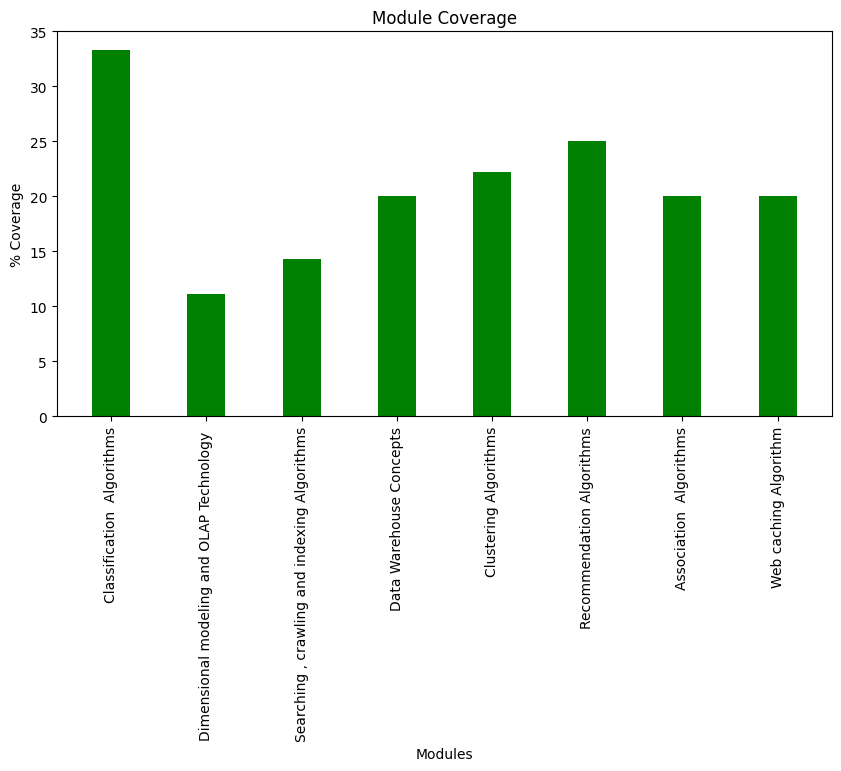

In [62]:
module = per_topics_covered.keys()
per_covered = per_topics_covered.values()

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(module, per_covered , color ='green',
        width = 0.4)

plt.xlabel("Modules")
plt.ylabel("% Coverage")
plt.title("Module Coverage")
plt.xticks(rotation = 90)
plt.show()

In [72]:
topics_not_covered_module = {}

for key, values in cd.items():
    if(key in module_topics):
        not_covered = list(filter(lambda i: i not in module_topics[key], values))
        topics_not_covered_module[key] = not_covered
    else:
        topics_not_covered_module[key] = values
    
print("Topics not covered by module")
print()
for key, values in topics_not_covered_module.items():
    print(key, ' : ', values)
    print()


Topics not covered by module

 Introduction  :  ['what motivated data mining', 'why is it important', 'what is data mining', 'data mining—on what kind of data', 'data mining functionalities—what kinds of patterns can be mined', 'are all of the patterns interesting', 'classification of data mining systems', 'data mining task primitives', 'integration of a data mining system with a database or data warehouse system', 'major issues in data mining.']

Data Warehouse Concepts  :  ['multidimensional data model', 'data warehouse architecture', 'data warehouse implementation', 'from data warehousing to data mining']

Data Pre-processing  :  ['data extraction', 'data cleaning', 'data integration and transformation', 'data reduction', 'loading into staging area', 'post load processing']

Dimensional modeling and OLAP Technology   :  ['defining dimensional model', 'granularity of facts', 'additivity of facts', 'helper tables', 'implementing many–to-many relationship between fact and dimension tab